In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import dateutil
import datetime
import json

from pycountry import countries

from data_loading import TwitterDataLoader, WhoDataLoader
from series_analysis import decompose

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [10, 6]

In [2]:
twitter_data = TwitterDataLoader('./data/twitter/')
who_data = WhoDataLoader('./data/who/')

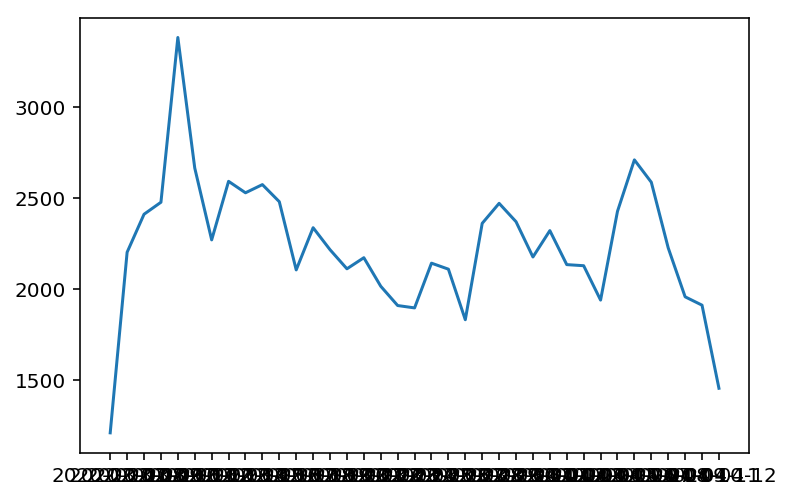

In [3]:
sample_data = twitter_data.get_data('PL')
plt.plot(sample_data)

## calculate correlations of series residuals

In [8]:
%%time

# params
valid_dates_range = ('8 mar 2020', '11 apr 2020')
who_source = 'confirmed' # confirmed | deaths | recovered
mean_window_size = 5


alpha_codes = [c.alpha_2 for c in countries]
results = {}

for code in alpha_codes:
    
    try:
        # get raw data
        twitter = twitter_data.get_data(code, valid_dates_range)
        who = who_data.get_data(code, who_source, valid_dates_range)
        
        # extract series components
        twitter_components = decompose(twitter, mean_window_size)
        who_components = decompose(who, mean_window_size)

        # calculate correlations
        trend_c = twitter_components['trend'].corr(who_components['trend'])
        res_c = twitter_components['residuals'].corr(who_components['residuals'])

        if np.isnan(trend_c) or np.isnan(res_c):
            print(code)
            continue
            
        results[code] = {
            'twitter_components': twitter_components,
            'who_components': who_components,
            'trend_correlation': trend_c,
            'residuals_correlation': res_c
        }
        
    except KeyError:
        pass

#print(results)
correlation_results = {}
for key in results:
    correlation_results[key] = {
        'trend_correlation': results[key]['trend_correlation'],
        'residuals_correlation': results[key]['residuals_correlation']
    }
        
with open('correlations.json', 'w') as f:
    json.dump(correlation_results, f)

KM
GW
TJ
CPU times: user 864 ms, sys: 54.7 ms, total: 918 ms
Wall time: 936 ms


MW summary: trend correlation = 0.8813986598256403, residuals correlation = 0.486478906149864


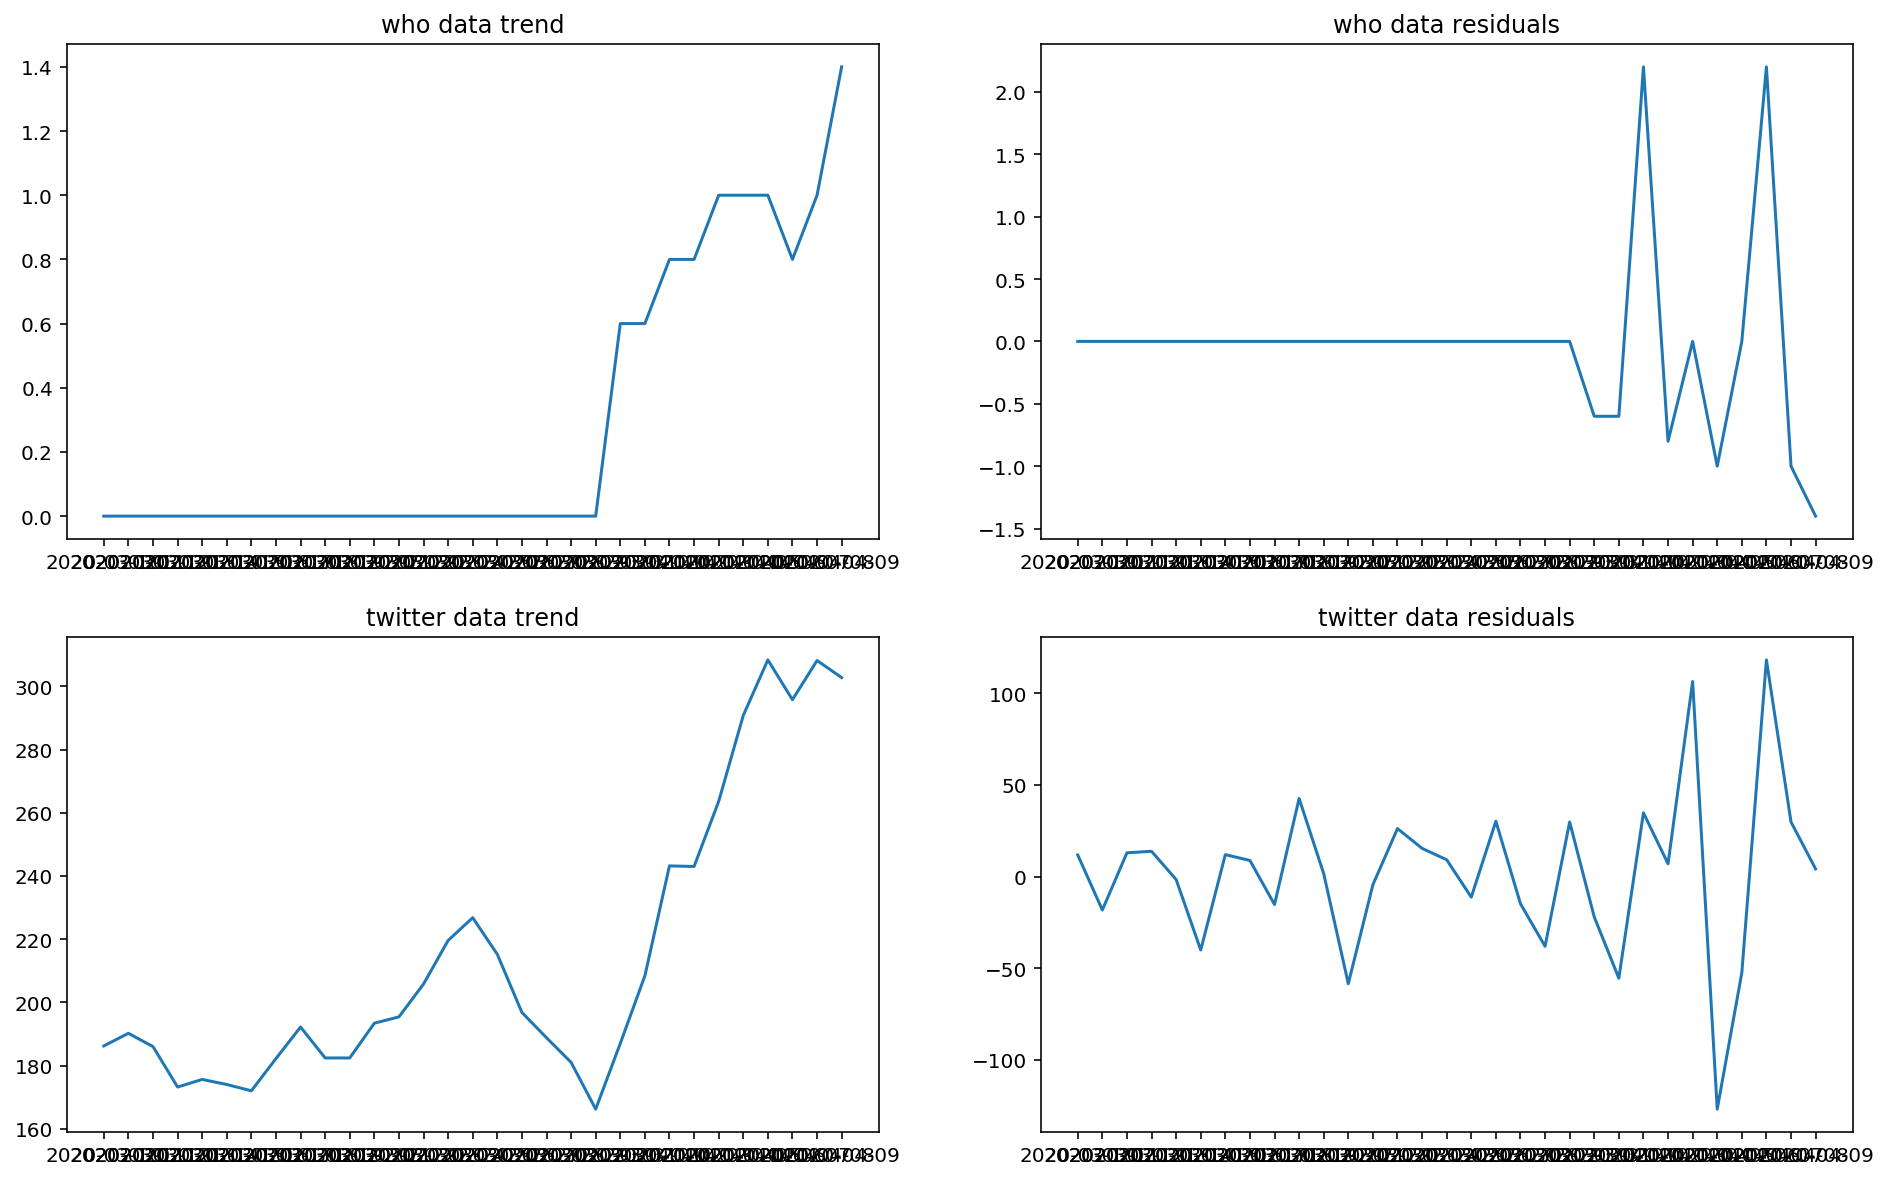

In [7]:
country = 'MW'

data = results[country]
trend_corr = data['trend_correlation']
res_corr = data['residuals_correlation']

print(f'{country} summary: trend correlation = {trend_corr}, residuals correlation = {res_corr}')

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(data['who_components']['trend'])
plt.title('who data trend')

plt.subplot(2, 2, 2)
plt.plot(data['who_components']['residuals'])
plt.title('who data residuals')

plt.subplot(2, 2, 3)
plt.plot(data['twitter_components']['trend'])
plt.title('twitter data trend')

plt.subplot(2, 2, 4)
plt.plot(data['twitter_components']['residuals'])
plt.title('twitter data residuals')

plt.show()